#**PROJECT OVERVIEW**
---
This project aims to create a model that is able to predict if a customer would or would not churn. Here, churn is defined as the act of a customer leaving a certain product. The dataset can be found below:

https://drive.google.com/file/d/1cL4egt1A0F9DHGH6Qd7uZouNAmK3FzXA/view?usp=sharing

note: in order to make it easier to extract, it is decided that the data would be placed inside github

#**Importing Libraries**
---

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_classif, chi2, RFECV
from sklearn.inspection import permutation_importance
from imblearn.under_sampling import RandomUnderSampler

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

from sklearn.metrics import classification_report, confusion_matrix, silhouette_score

#**Data Loading**
---
Our data consists of the following columns:
1. **State**: the state where the customer resides.
2. **Account length**
3. **Area code**: the customer's area code.
4. **International plan**: whether or not the customer has an international plan (Yes or No).
5. **Voice mail plan**: whether or not the customer has a voice mail plan (Yes or No).
6. **Number vmail messages**: number of vmails messages the customer has received.
7. **Total day minutes**: the duration (in minutes) during the day that the customer has used for calls.
8. **Total day calls**: the number of calls during the day that the customer has done and/or received.
9. **Total day charge**: the amount charged for calls during the day that the customer has done and/or received.
10. **Total eve minutes**: the duration (in minutes) during the evening that the customer has used for calls.
11. **Total eve calls**: the number of calls during the evening that the customer has done and/or received.
12. **Total eve charge**: the amount charged for calls during the evening that the customer has done and/or received.
13. **Total night minutes**: the duration (in minutes) during at night that the customer has used for calls.
14. **Total night calls**: the number of calls during at night that the customer has done and/or received.
15. **Total night charge**: the amount charged for calls at night that the customer has done and/or received.
16. **Total intl minutes**: the duration (in minutes) that the customer has spent on international calls.
17. **Total intl calls**: the number of international calls that the customer has done and/or received.
18. **Total intl charge**: the amount charged for international calls done by the customer.
19. **Customer service calls**: the number of customer service calls a customer has done.
19. **Churn**: whether or not the customer has churned (False = not churned, True = churned)

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/comradeftj/Datsets/refs/heads/main/Telco_Churn_DA.csv')
df.head()

State  Account length  Area code International plan Voice mail plan  \
0    LA             117        408                 No              No   
1    IN              65        415                 No              No   
2    NY             161        415                 No              No   
3    SC             111        415                 No              No   
4    HI              49        510                 No              No   

   Number vmail messages  Total day minutes  Total day calls  \
0                      0              184.5               97   
1                      0              129.1              137   
2                      0              332.9               67   
3                      0              110.4              103   
4                      0              119.3              117   

   Total day charge  Total eve minutes  Total eve calls  Total eve charge  \
0             31.37              351.6               80             29.89   
1             21.95              228.5               83             19.42   
2             56.59              317.8               97             27.01   
3             18.77              137.3              102             11.67   
4             20.28              215.1              109             18.28   

   Total night minutes  Total night calls  Total night charge  \
0                215.8                 90                9.71   
1                208.8                111                9.40   
2                160.6                128                7.23   
3                189.6                105                8.53   
4                178.7                 90                8.04   

   Total intl minutes  Total intl calls  Total intl charge  \
0                 8.7                 4               2.35   
1                12.7                 6               3.43   
2                 5.4                 9               1.46   
3                 7.7                 6               2.08   
4                11.1                 1               3.00   

   Customer service calls  Churn  
0                       1  False  
1                       4   True  
2                       4   True  
3                       2  False  
4                       1  False

#**Exploratory Data Analysis (EDA)**
---
In this process, we analyze the data's characteristics, in order to prepare the dataset for further analysis, primarily regarding model creation.

##**1. Data Type Information**
---

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 667 entries, 0 to 666
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   667 non-null    object 
 1   Account length          667 non-null    int64  
 2   Area code               667 non-null    int64  
 3   International plan      667 non-null    object 
 4   Voice mail plan         667 non-null    object 
 5   Number vmail messages   667 non-null    int64  
 6   Total day minutes       667 non-null    float64
 7   Total day calls         667 non-null    int64  
 8   Total day charge        667 non-null    float64
 9   Total eve minutes       667 non-null    float64
 10  Total eve calls         667 non-null    int64  
 11  Total eve charge        667 non-null    float64
 12  Total night minutes     667 non-null    float64
 13  Total night calls       667 non-null    int64  
 14  Total night charge      667 non-null    fl

In [4]:
df.describe(include='all')

State  Account length   Area code International plan Voice mail plan  \
count    667      667.000000  667.000000                667             667   
unique    51             NaN         NaN                  2               2   
top       AZ             NaN         NaN                 No              No   
freq      19             NaN         NaN                614             478   
mean     NaN      102.841079  436.157421                NaN             NaN   
std      NaN       40.819480   41.783305                NaN             NaN   
min      NaN        1.000000  408.000000                NaN             NaN   
25%      NaN       76.000000  408.000000                NaN             NaN   
50%      NaN      102.000000  415.000000                NaN             NaN   
75%      NaN      128.000000  415.000000                NaN             NaN   
max      NaN      232.000000  510.000000                NaN             NaN   

        Number vmail messages  Total day minutes  Total day calls  \
count              667.000000         667.000000       667.000000   
unique                    NaN                NaN              NaN   
top                       NaN                NaN              NaN   
freq                      NaN                NaN              NaN   
mean                 8.407796         180.948126       100.937031   
std                 13.994480          55.508628        20.396790   
min                  0.000000          25.900000        30.000000   
25%                  0.000000         146.250000        87.500000   
50%                  0.000000         178.300000       101.000000   
75%                 20.000000         220.700000       115.000000   
max                 51.000000         334.300000       165.000000   

        Total day charge  Total eve minutes  Total eve calls  \
count         667.000000         667.000000       667.000000   
unique               NaN                NaN              NaN   
top                  NaN                NaN              NaN   
freq                 NaN                NaN              NaN   
mean           30.761769         203.355322       100.476762   
std             9.436463          49.719268        18.948262   
min             4.400000          48.100000        37.000000   
25%            24.860000         171.050000        88.000000   
50%            30.310000         203.700000       101.000000   
75%            37.520000         236.450000       113.000000   
max            56.830000         361.800000       168.000000   

        Total eve charge  Total night minutes  Total night calls  \
count         667.000000           667.000000         667.000000   
unique               NaN                  NaN                NaN   
top                  NaN                  NaN                NaN   
freq                 NaN                  NaN                NaN   
mean           17.285262           199.685307         100.113943   
std             4.226160            49.759931          20.172505   
min             4.090000            23.200000          42.000000   
25%            14.540000           167.950000          86.000000   
50%            17.310000           201.600000         100.000000   
75%            20.095000           231.500000         113.500000   
max            30.750000           367.700000         175.000000   

        Total night charge  Total intl minutes  Total intl calls  \
count           667.000000          667.000000        667.000000   
unique                 NaN                 NaN               NaN   
top                    NaN                 NaN               NaN   
freq                   NaN                 NaN               NaN   
mean              8.985907           10.238381          4.527736   
std               2.239429            2.807850          2.482442   
min               1.040000            0.000000          0.000000   
25%               7.560000            8.600000          3.000000   
50%               9.070000     

##**2. Duplicate Data Detection**
---

In [5]:
df.duplicated().sum()

np.int64(0)

##**3. Data Distribution**
---

###a. Numerical Data Distribution

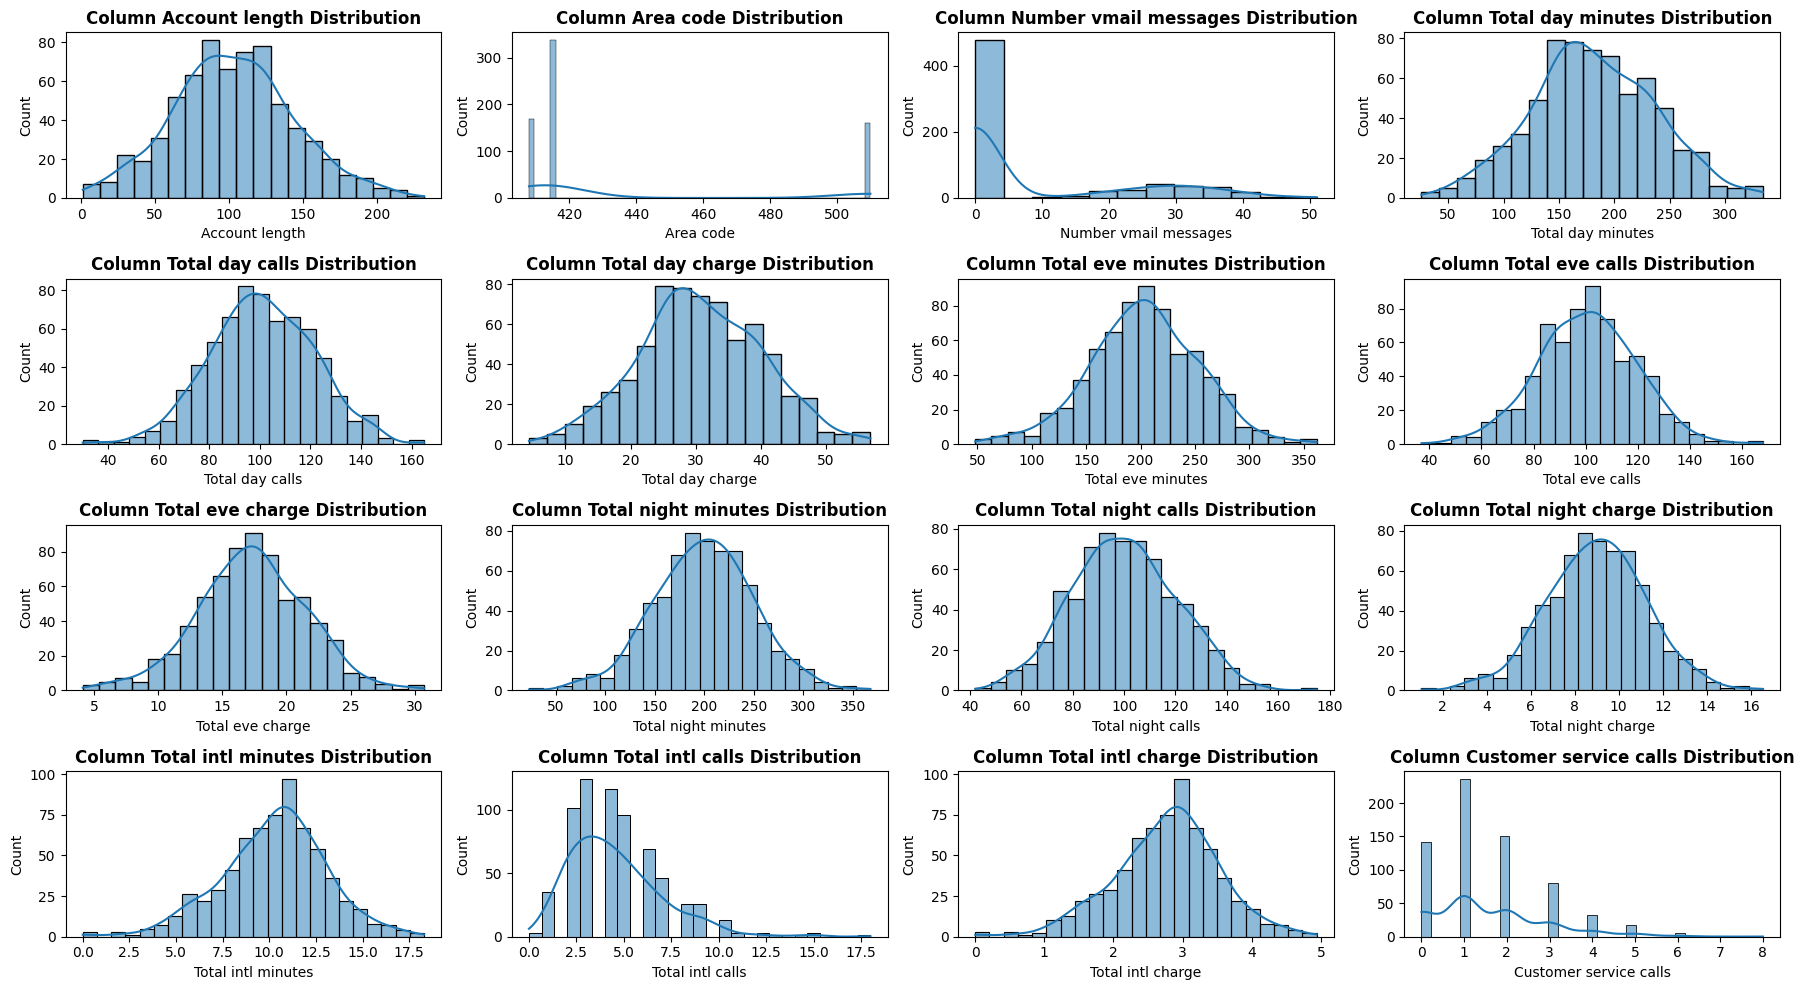

In [6]:
df_numeric = df.select_dtypes(include='number')

plt.figure(figsize=(18, 10))
for i, col in enumerate(df_numeric.columns):
  plt.subplot(4, 4, i+1)
  sns.histplot(df[col], kde=True)
  plt.title(f'Column {col} Distribution', fontweight='bold')
plt.tight_layout()
plt.show()

###b. Categorical Data Distribution

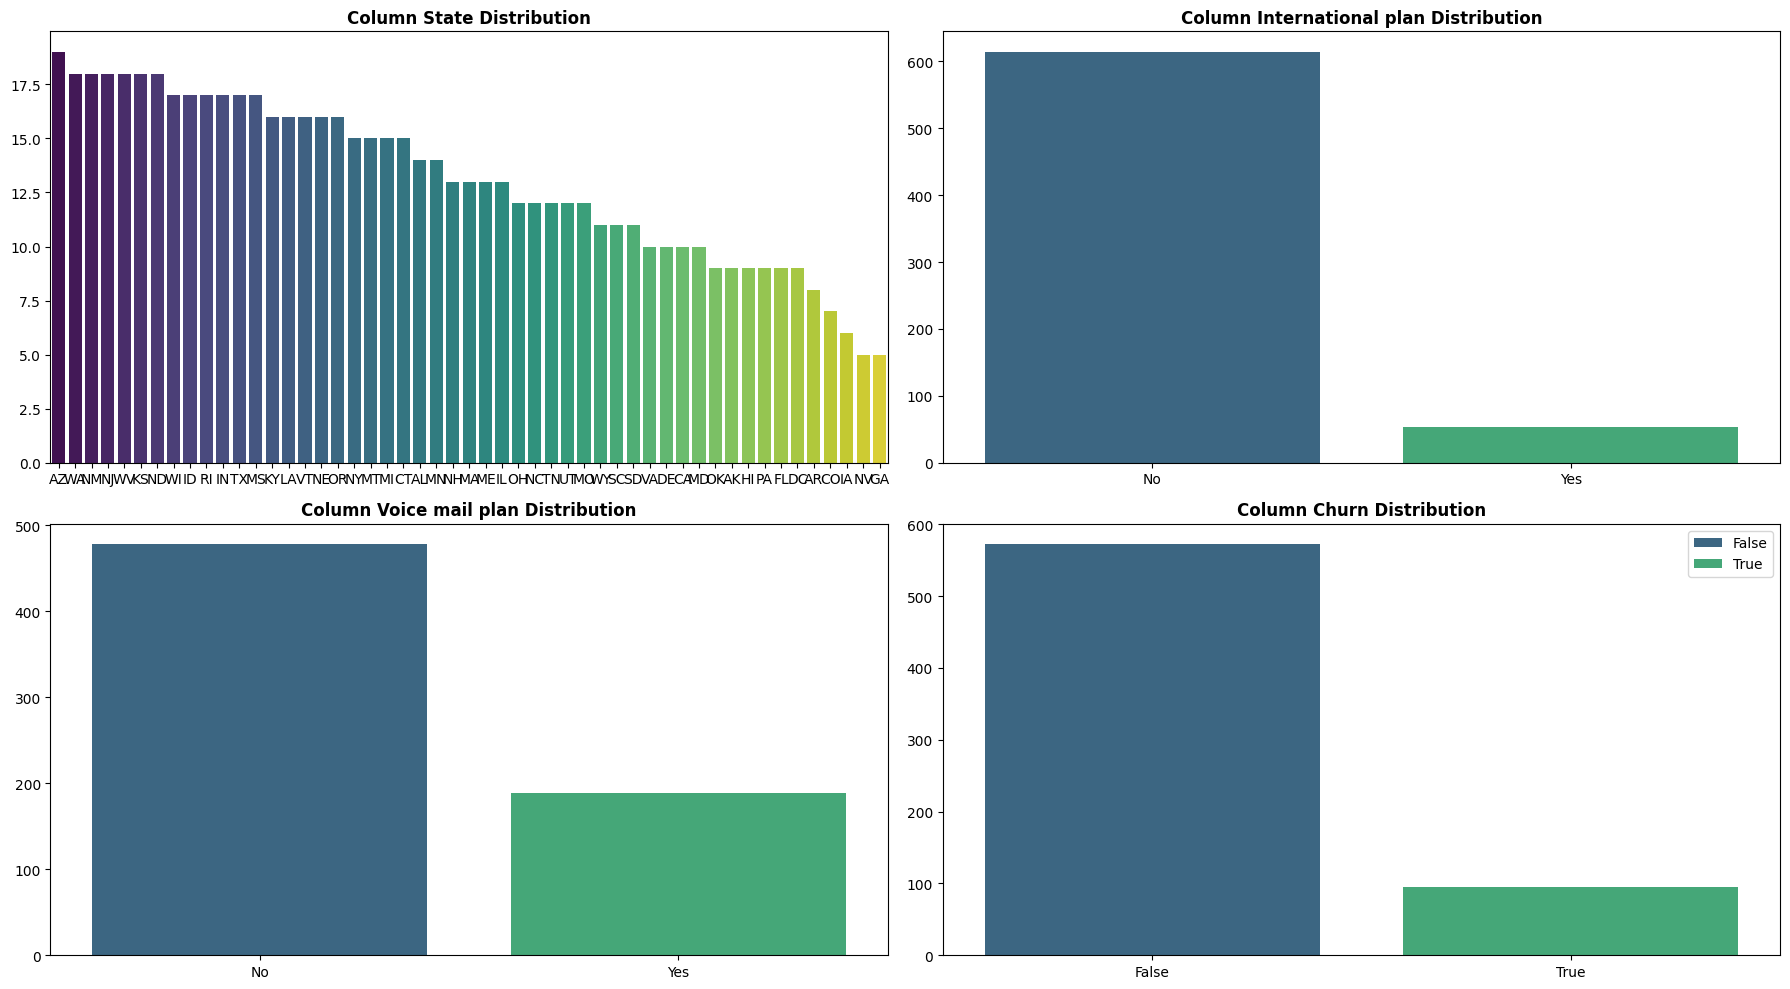

In [7]:
df_object = df.select_dtypes(include=['object', 'bool'])

plt.figure(figsize=(18, 10))
for i, col in enumerate(df_object.columns):
  plt.subplot(2, 2, i+1)
  data = df[col].value_counts()
  x = data.index.tolist()
  y = data.values.tolist()
  sns.barplot(x=x, y=y, hue=x, palette='viridis')
  plt.title(f'Column {col} Distribution', fontweight='bold')
plt.tight_layout()
plt.show()

##**4. Data Outlier Detection**
---

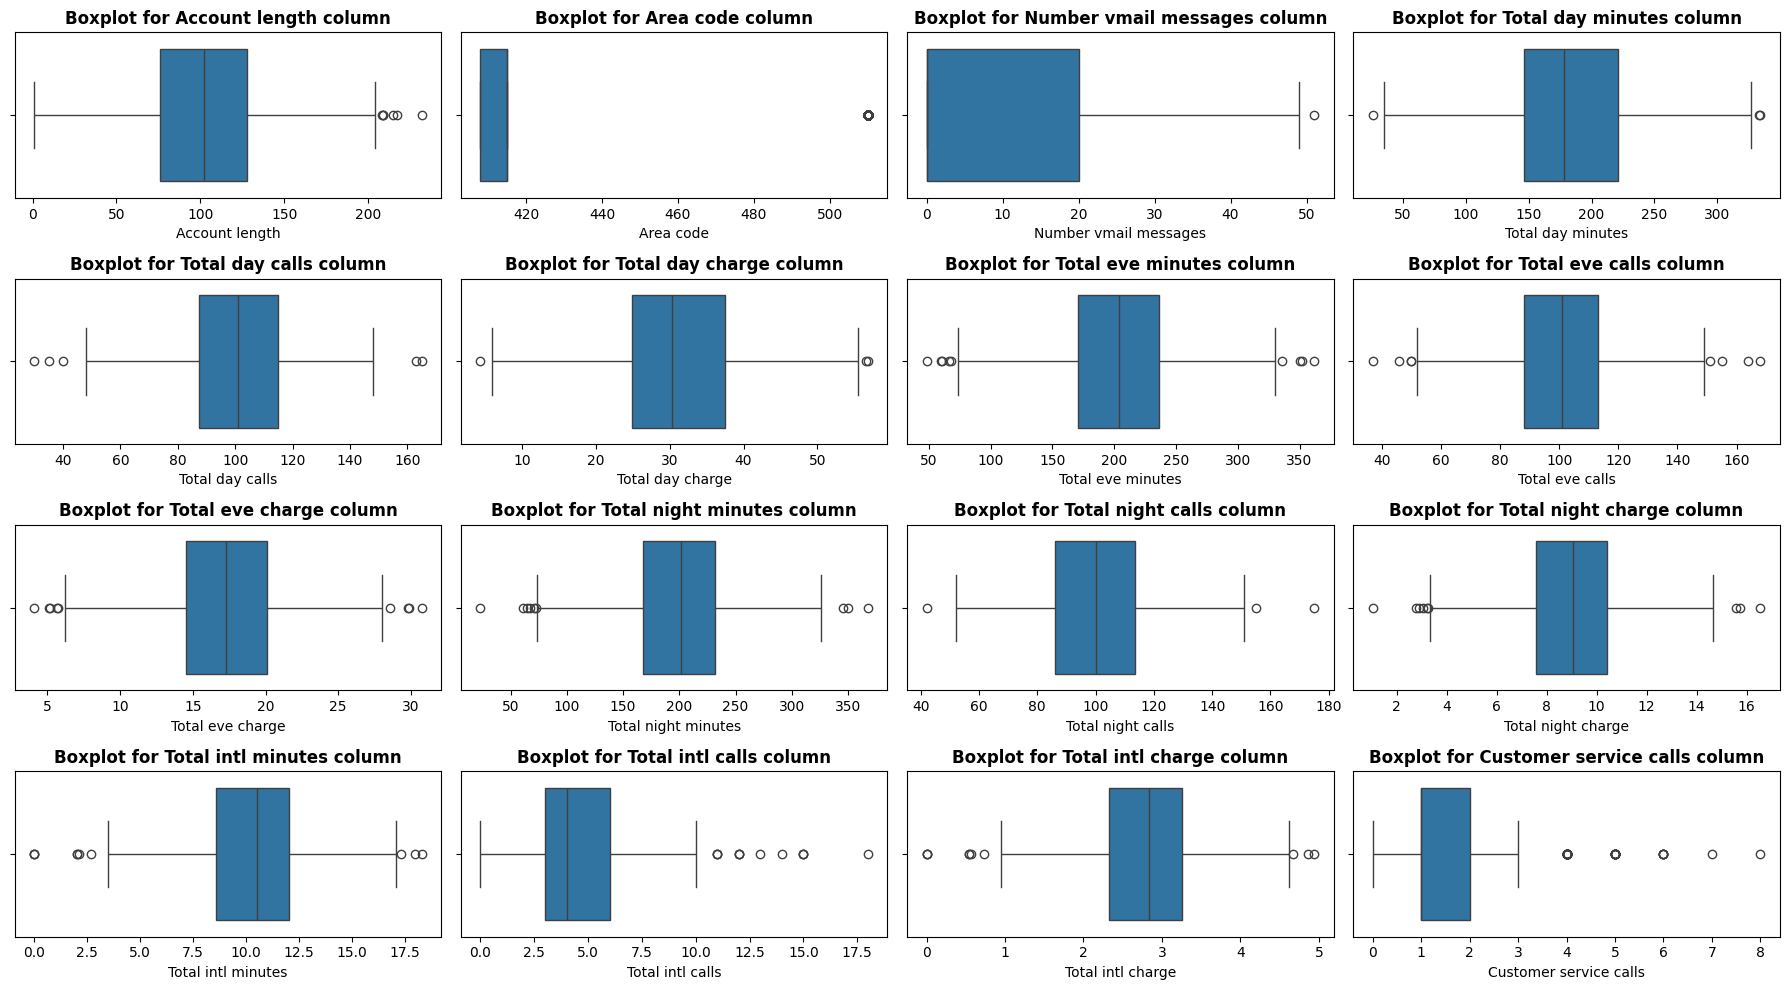

In [8]:
df_numeric = df.select_dtypes(include='number')

plt.figure(figsize=(18, 10))
for i, col in enumerate(df_numeric.columns):
  plt.subplot(4, 4, i+1)
  sns.boxplot(x=df[col])
  plt.title(f'Boxplot for {col} column', fontweight='bold')
plt.tight_layout()
plt.show()

##**5. Data Correlation**
---

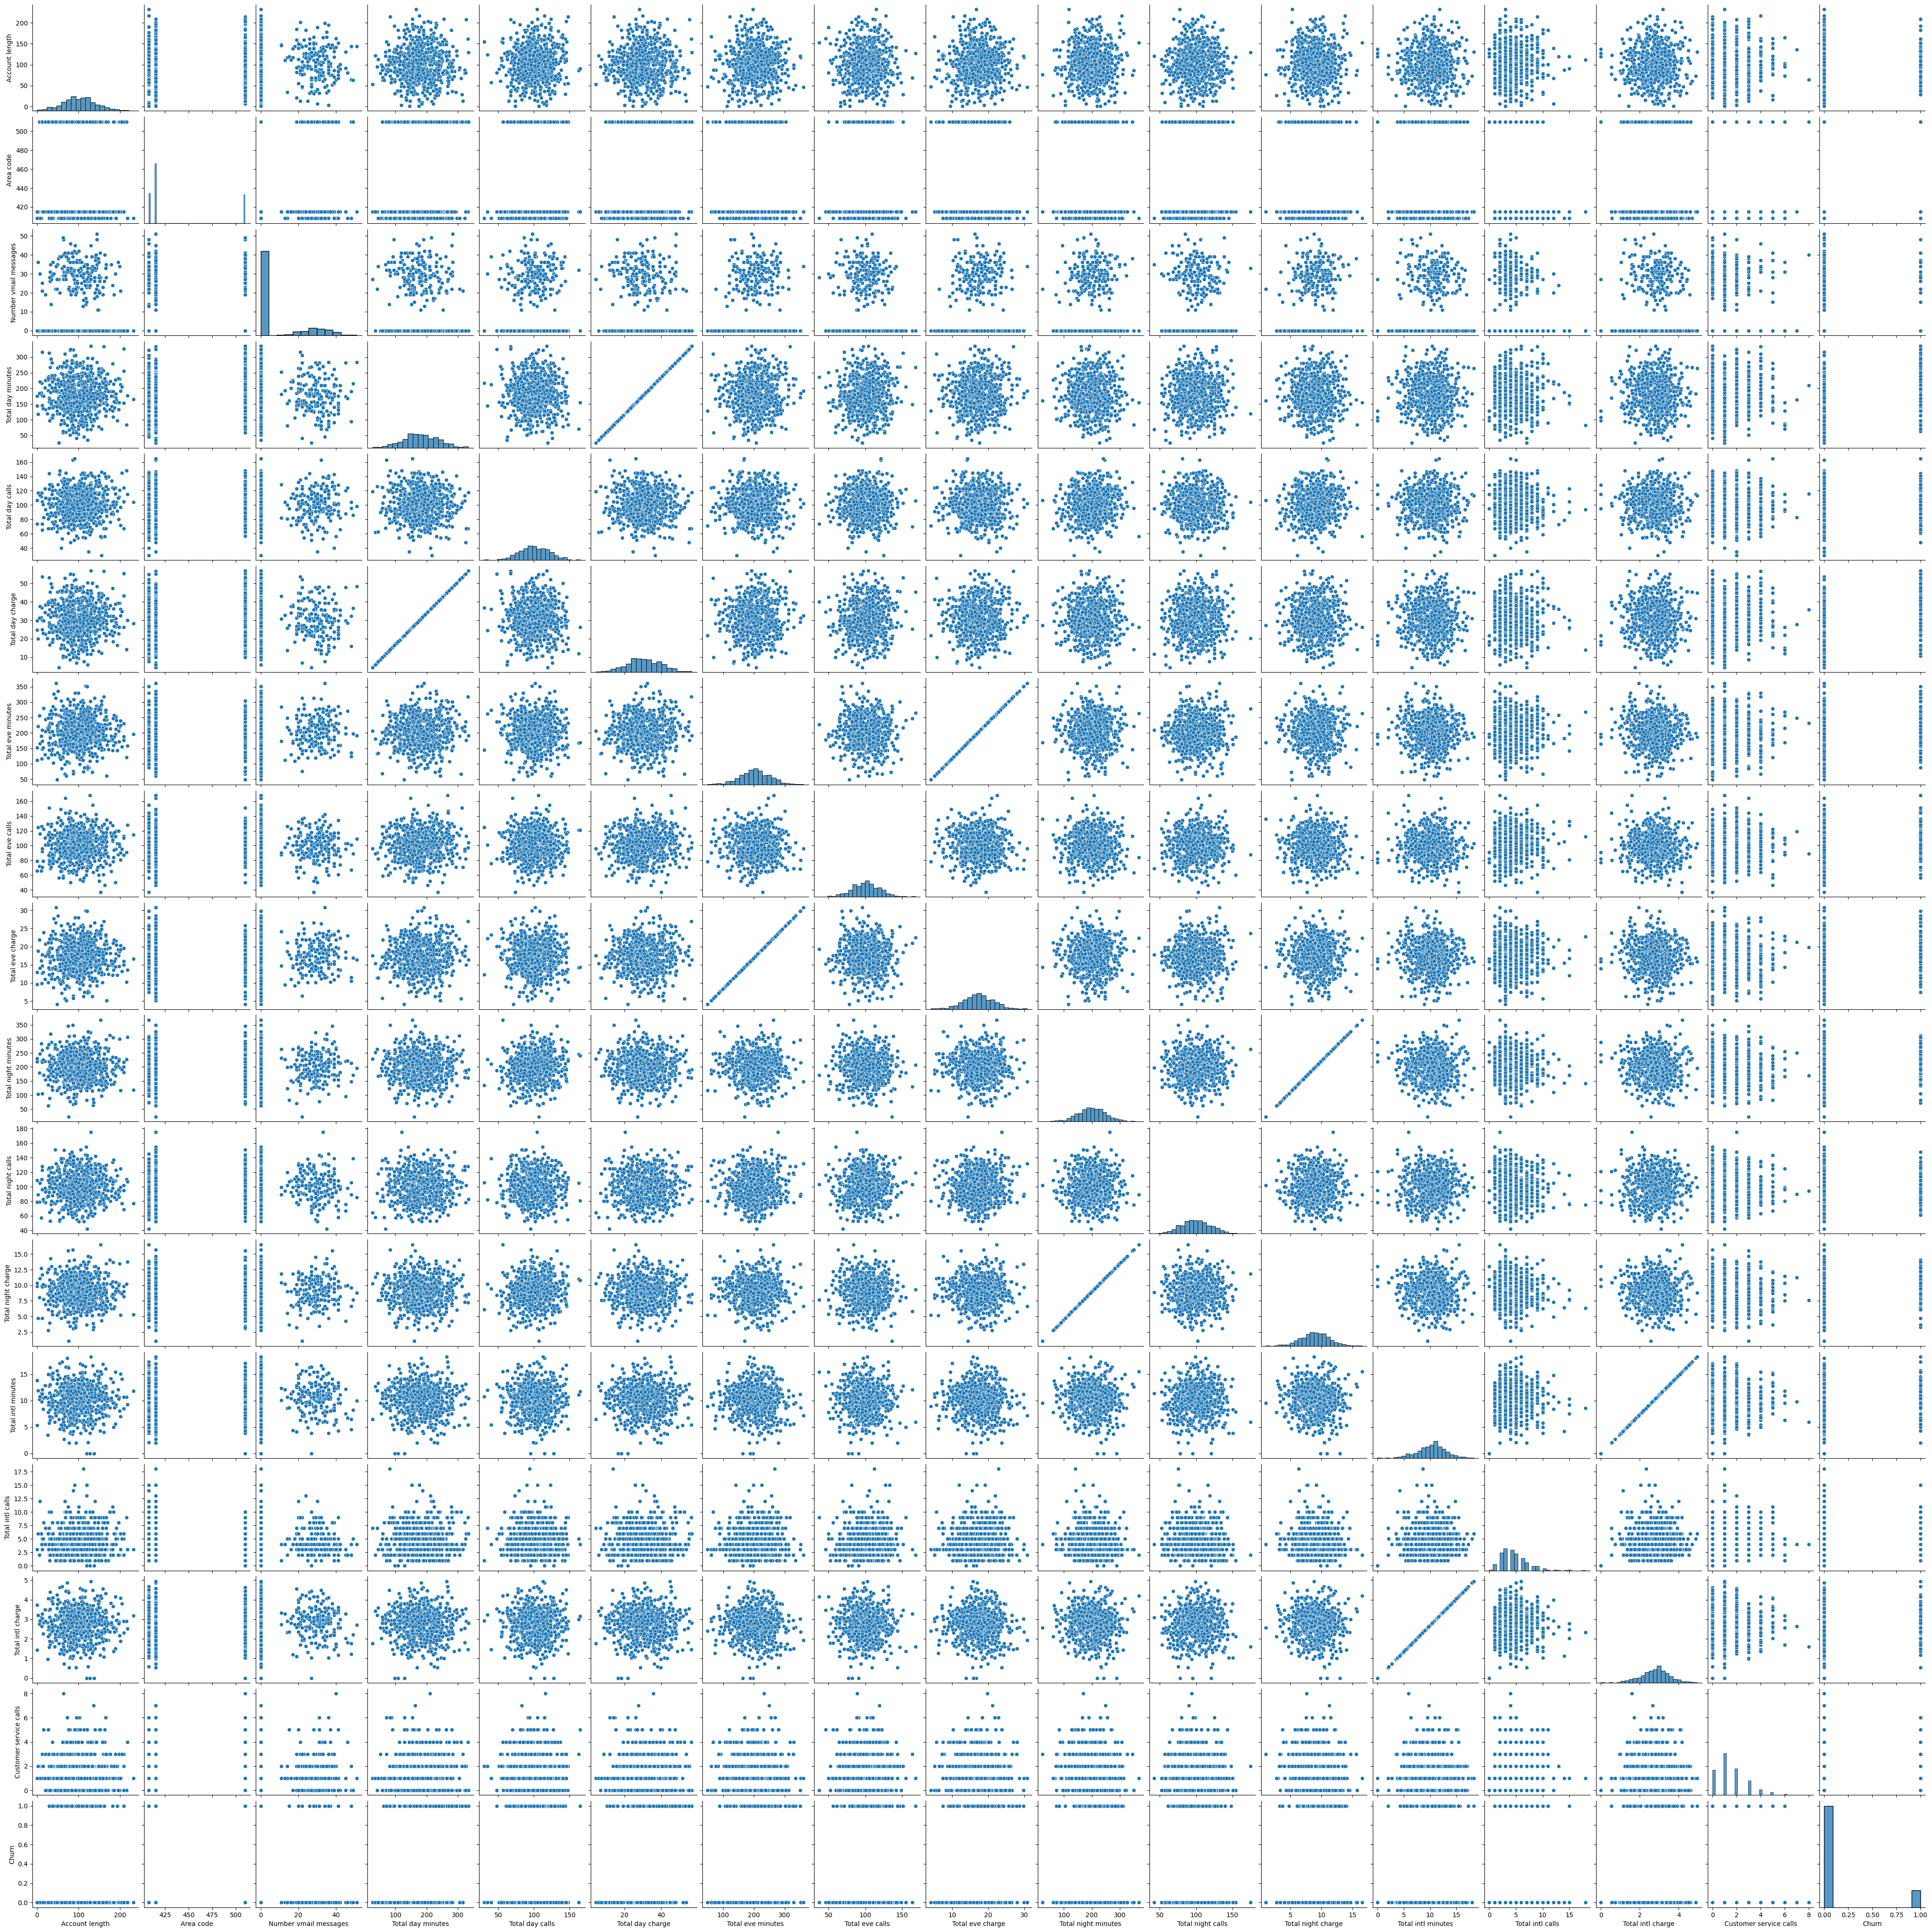

In [9]:
sns.pairplot(df)
plt.show()

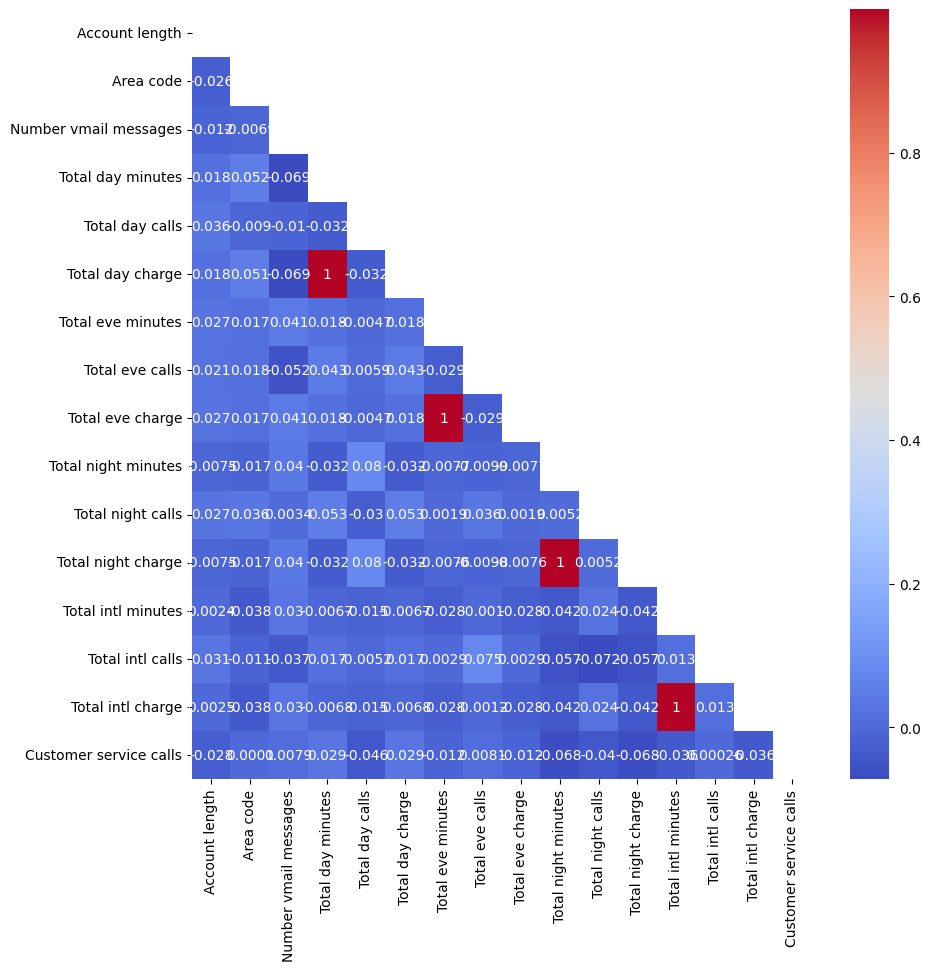

In [10]:
df_numeric = df.select_dtypes(include='number')

correlation = df_numeric.corr()
mask = np.triu(np.ones_like(correlation, dtype=float))

plt.figure(figsize=(10, 10))
sns.heatmap(correlation, mask=mask, annot=True, cmap='coolwarm')
plt.show()

#**Data Cleaning**
---

##**1. Outlier Handling**
---

In [11]:
numeric = df.select_dtypes(include='number')

for col in numeric.columns:
  q1 = df[col].quantile(0.25)
  q3 = df[col].quantile(0.75)
  iqr = q3-q1

  outliers = np.where((df[col] < (q1 - 1.5 * iqr)) | (df[col] > (q3 + 1.5 * iqr)))[0]
  p = (len(outliers) / len(df)) * 100
  print(f'Percentage of outliers on {col} column: {p}%')

Percentage of outliers on Account length column: 0.8995502248875562%
Percentage of outliers on Area code column: 24.137931034482758%
Percentage of outliers on Number vmail messages column: 0.14992503748125938%
Percentage of outliers on Total day minutes column: 0.4497751124437781%
Percentage of outliers on Total day calls column: 0.7496251874062968%
Percentage of outliers on Total day charge column: 0.4497751124437781%
Percentage of outliers on Total eve minutes column: 1.3493253373313343%
Percentage of outliers on Total eve calls column: 1.199400299850075%
Percentage of outliers on Total eve charge column: 1.3493253373313343%
Percentage of outliers on Total night minutes column: 1.3493253373313343%
Percentage of outliers on Total night calls column: 0.4497751124437781%
Percentage of outliers on Total night charge column: 1.3493253373313343%
Percentage of outliers on Total intl minutes column: 1.4992503748125936%
Percentage of outliers on Total intl calls column: 1.7991004497751124%
Pe

In [12]:
# Based on the resulting outliers above, the number of outliers in each column are fairly insignificant,
# except for the Area Code column, which has more than 24% outlier rate. However, based on the boxplot
# on the previous chapter, there are extreme values

area_code_ext = df[df['Area code'] > 500]
area_code_ext

# whilst these data are outliers, the proportion of outlier data, whilst significant, do not exceed 30%, and,
# combined with the fact that these are very likely valid area codes (as it's repeated many times), it would not
# be deleted

State  Account length  Area code International plan Voice mail plan  \
4      HI              49        510                 No              No   
10     MN              74        510                 No             Yes   
13     VT             128        510                 No             Yes   
19     MI              36        510                 No             Yes   
28     MO               6        510                 No              No   
..    ...             ...        ...                ...             ...   
653    MD             133        510                 No              No   
654    NY             120        510                 No             Yes   
656    AK              99        510                 No              No   
659    CA             127        510                 No              No   
666    CT             184        510                Yes              No   

     Number vmail messages  Total day minutes  Total day calls  \
4                        0              119.3              117   
10                      33              193.7               91   
13                      29              179.3              104   
19                      29              281.4              102   
28                       0              183.6              117   
..                     ...                ...              ...   
653                      0              295.0              141   
654                     27              128.5              115   
656                      0              238.4               96   
659                      0              107.9              128   
666                      0              213.8              105   

     Total day charge  Total eve minutes  Total eve calls  Total eve charge  \
4               20.28              215.1              109             18.28   
10              32.93              246.1               96             20.92   
13              30.48              225.9               86             19.20   
19              47.84              202.2               76             17.19   
28              31.21              256.7               72             21.82   
..                ...                ...              ...               ...   
653             50.15              223.6              101             19.01   
654             21.85              163.7               91             13.91   
656             40.53              246.5              130             20.95   
659             18.34              187.0               77             15.90   
666             36.35              159.6               84             13.57   

     Total night minutes  Total night calls  Total night charge  \
4                  178.7                 90                8.04   
10                 138.0                 92                6.21   
13                 323.0                 78               14.54   
19                 187.2                113                8.42   
28                 178.6                 79                8.04   
..                   ...                ...                 ...   
653                229.4                109               10.32   
654                242.9                121               10.93   
656                198.4                117                8.93   
659                218.5                 95                9.83   
666                139.2                137                6.26   

     Total intl minutes  Total intl calls  Total intl charge  \
4                  11.1                 1               3.00   
10                 14.6                 3               3.94   
13                  8.6                 7               2.32   
19                  9.0                 6               2.43   
28                 10.2                 2               2.75   
..                  ...               ...                ...   
653                12.9                 4               3.48   
654                 0.0                 0   

#**Data Preparation**
---

##**1. Categorical Feature Encoding**
---

In [13]:
col = ['Voice mail plan', 'International plan', 'Churn']

df = pd.get_dummies(df, columns=col, drop_first=True, dtype=int)
df.head()

State  Account length  Area code  Number vmail messages  Total day minutes  \
0    LA             117        408                      0              184.5   
1    IN              65        415                      0              129.1   
2    NY             161        415                      0              332.9   
3    SC             111        415                      0              110.4   
4    HI              49        510                      0              119.3   

   Total day calls  Total day charge  Total eve minutes  Total eve calls  \
0               97             31.37              351.6               80   
1              137             21.95              228.5               83   
2               67             56.59              317.8               97   
3              103             18.77              137.3              102   
4              117             20.28              215.1              109   

   Total eve charge  Total night minutes  Total night calls  \
0             29.89                215.8                 90   
1             19.42                208.8                111   
2             27.01                160.6                128   
3             11.67                189.6                105   
4             18.28                178.7                 90   

   Total night charge  Total intl minutes  Total intl calls  \
0                9.71                 8.7                 4   
1                9.40                12.7                 6   
2                7.23                 5.4                 9   
3                8.53                 7.7                 6   
4                8.04                11.1                 1   

   Total intl charge  Customer service calls  Voice mail plan_Yes  \
0               2.35                       1                    0   
1               3.43                       4                    0   
2               1.46                       4                    0   
3               2.08                       2                    0   
4               3.00                       1                    0   

   International plan_Yes  Churn_True  
0                       0           0  
1                       0           1  
2                       0           1  
3                       0           0  
4                       0           0

In [14]:
df = df.rename(columns={
    'Churn_True': 'Churn'
})

df.head()

State  Account length  Area code  Number vmail messages  Total day minutes  \
0    LA             117        408                      0              184.5   
1    IN              65        415                      0              129.1   
2    NY             161        415                      0              332.9   
3    SC             111        415                      0              110.4   
4    HI              49        510                      0              119.3   

   Total day calls  Total day charge  Total eve minutes  Total eve calls  \
0               97             31.37              351.6               80   
1              137             21.95              228.5               83   
2               67             56.59              317.8               97   
3              103             18.77              137.3              102   
4              117             20.28              215.1              109   

   Total eve charge  Total night minutes  Total night calls  \
0             29.89                215.8                 90   
1             19.42                208.8                111   
2             27.01                160.6                128   
3             11.67                189.6                105   
4             18.28                178.7                 90   

   Total night charge  Total intl minutes  Total intl calls  \
0                9.71                 8.7                 4   
1                9.40                12.7                 6   
2                7.23                 5.4                 9   
3                8.53                 7.7                 6   
4                8.04                11.1                 1   

   Total intl charge  Customer service calls  Voice mail plan_Yes  \
0               2.35                       1                    0   
1               3.43                       4                    0   
2               1.46                       4                    0   
3               2.08                       2                    0   
4               3.00                       1                    0   

   International plan_Yes  Churn  
0                       0      0  
1                       0      1  
2                       0      1  
3                       0      0  
4                       0      0

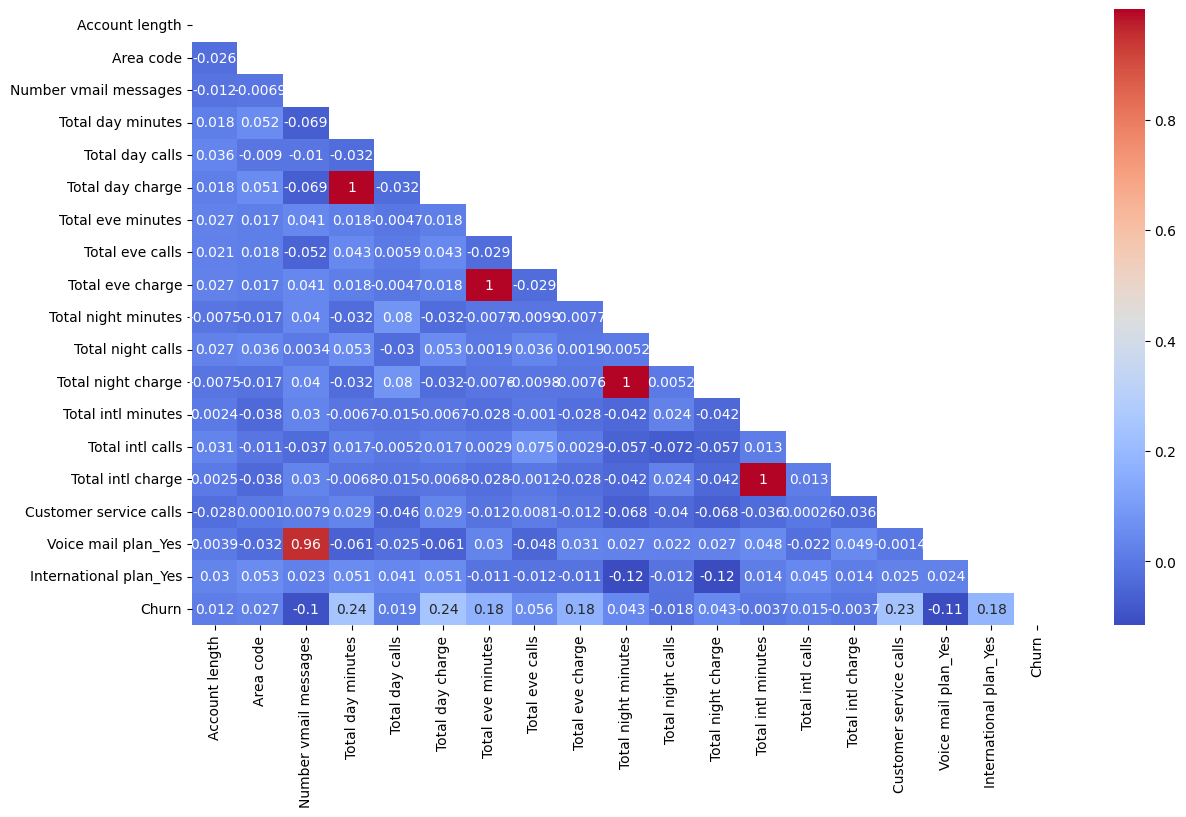

In [15]:
df_numeric = df.select_dtypes(include='number')

correlation = df_numeric.corr()
mask = np.triu(np.ones_like(correlation, dtype=bool))

plt.figure(figsize=(14, 8))
sns.heatmap(correlation, mask=mask, annot=True, cmap='coolwarm')
plt.show()

##**2. Feature Selection**
---

In [16]:
x_input = df[[col for col in df.columns if col not in ['Churn', 'State']]]
y = df['Churn']

###a. RFECV

In [17]:
lr = LogisticRegression()

selector = RFECV(
    estimator=lr,
    step=1,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    min_features_to_select=5,
    verbose=5,
    #max_iter=100000
)
selector.fit(x_input, y)
print(selector.support_)

result = pd.DataFrame({
    'use': selector.support_.tolist()
}, index=x_input.columns.tolist())

display(result)
columns_to_use = result[result['use']==True].index.tolist()

Fitting estimator with 18 features.
Fitting estimator with 17 features.
Fitting estimator with 16 features.
Fitting estimator with 15 features.
Fitting estimator with 14 features.
Fitting estimator with 13 features.
Fitting estimator with 12 features.
[False  True  True  True False False  True False False False  True False
  True  True  True  True  True  True]


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

use
Account length          False
Area code                True
Number vmail messages    True
Total day minutes        True
Total day calls         False
Total day charge        False
Total eve minutes        True
Total eve calls         False
Total eve charge        False
Total night minutes     False
Total night calls        True
Total night charge      False
Total intl minutes       True
Total intl calls         True
Total intl charge        True
Customer service calls   True
Voice mail plan_Yes      True
International plan_Yes   True

###b. Select K-Best

In [18]:
selector = SelectKBest(score_func=f_classif, k=6)
selector.fit(x_input, y)

score_df = pd.DataFrame({
    'scores': selector.scores_
}, index=x_input.columns).sort_values(by='scores', ascending=False)
score_df

scores
Total day minutes       41.651876
Total day charge        41.650275
Customer service calls  38.264489
International plan_Yes  22.687496
Total eve charge        21.161995
Total eve minutes       21.161392
Voice mail plan_Yes      8.673095
Number vmail messages    7.044245
Total eve calls          2.067284
Total night charge       1.229475
Total night minutes      1.227859
Area code                0.489805
Total day calls          0.249344
Total night calls        0.206675
Total intl calls         0.156337
Account length           0.100874
Total intl minutes       0.009302
Total intl charge        0.009009

##**3. Data Splitting and Sampling**
---

In [19]:
x = x_input[columns_to_use]#selector.transform(x_input)
y = df['Churn']

rus = RandomUnderSampler(random_state=42)
x_resampled, y_resampled = rus.fit_resample(x, y)

x_train, x_test, y_train, y_test = train_test_split(x_resampled, y_resampled, test_size=0.2, random_state=42)

##**4. Data Scaling**
---

In [20]:
scaler = StandardScaler()
scaler.fit(x_train)

x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

#**Data Modelling**
---

##**1. PCA**
---
Finding the optimal number of components

In [21]:
scaler = StandardScaler()
x_input_pca = scaler.fit_transform(x_input)

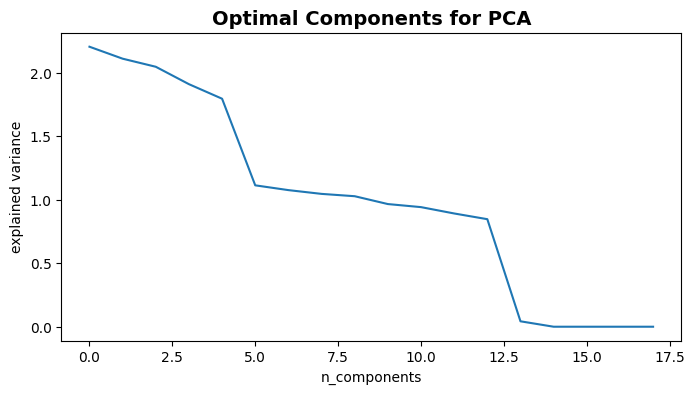

In [22]:
pca = PCA().fit(x_input_pca)
plt.figure(figsize=(8, 4))
plt.plot(pca.explained_variance_)
plt.title('Optimal Components for PCA', fontsize=14, fontweight='bold')
plt.xlabel('n_components')
plt.ylabel('explained variance')
plt.show()

In [23]:
pca = PCA(n_components=8)

x_copy = x_input.copy()
scaler = StandardScaler()
x_copy = scaler.fit_transform(x_copy)
x_pca = pca.fit_transform(x_copy)
y_pca = df['Churn']

print(f'Ratio of explained variance:\n{pca.explained_variance_ratio_}')

rus = RandomUnderSampler(random_state=42)
x_res_pca, y_res_pca = rus.fit_resample(x_pca, y_pca)

x_train_pca, x_test_pca, y_train_pca, y_test_pca = train_test_split(x_resampled, y_resampled, test_size=0.2, random_state=42)
scaler = StandardScaler()
scaler.fit(x_train_pca)

x_train_scaled_pca = scaler.transform(x_train_pca)
x_test_scaled_pca = scaler.transform(x_test_pca)

Ratio of explained variance:
[0.12235819 0.11713163 0.11360063 0.10599489 0.09963644 0.06178638
 0.05969617 0.05804868]


##**2. Classification Model**
---

###a. SVM Classification

In [24]:
# Result with PCA

svc = SVC(kernel='rbf')
svc.fit(x_train_pca, y_train_pca)

y_pred = svc.predict(x_test_pca)
report = classification_report(y_test_pca, y_pred)
cm = confusion_matrix(y_test_pca, y_pred)

print(f'Classification Report:\n{report}\n')
print(f'Confusion Matrix:\n{cm}\n')

Classification Report:
              precision    recall  f1-score   support

           0       0.56      0.83      0.67        18
           1       0.73      0.40      0.52        20

    accuracy                           0.61        38
   macro avg       0.64      0.62      0.59        38
weighted avg       0.65      0.61      0.59        38


Confusion Matrix:
[[15  3]
 [12  8]]



In [25]:
svc = SVC(kernel='rbf')
svc.fit(x_train, y_train)

y_pred = svc.predict(x_test)
report = classification_report(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print(f'Classification Report:\n{report}\n')
print(f'Confusion Matrix:\n{cm}\n')

Classification Report:
              precision    recall  f1-score   support

           0       0.56      0.83      0.67        18
           1       0.73      0.40      0.52        20

    accuracy                           0.61        38
   macro avg       0.64      0.62      0.59        38
weighted avg       0.65      0.61      0.59        38


Confusion Matrix:
[[15  3]
 [12  8]]



###b. Logistic Regression

In [26]:
# Result with PCA

logreg = LogisticRegression()
logreg.fit(x_train_pca, y_train_pca)

y_pred = logreg.predict(x_test_pca)
report = classification_report(y_test_pca, y_pred)
cm = confusion_matrix(y_test_pca, y_pred)

print(f'Classification Report:\n{report}\n')
print(f'Confusion Matrix:\n{cm}\n')

Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.83      0.81        18
           1       0.84      0.80      0.82        20

    accuracy                           0.82        38
   macro avg       0.82      0.82      0.82        38
weighted avg       0.82      0.82      0.82        38


Confusion Matrix:
[[15  3]
 [ 4 16]]



/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [27]:
# Result without PCA

logreg = LogisticRegression()
logreg.fit(x_train, y_train)

y_pred = logreg.predict(x_test)
report = classification_report(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print(f'Classification Report:\n{report}\n')
print(f'Confusion Matrix:\n{cm}\n')

Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.83      0.81        18
           1       0.84      0.80      0.82        20

    accuracy                           0.82        38
   macro avg       0.82      0.82      0.82        38
weighted avg       0.82      0.82      0.82        38


Confusion Matrix:
[[15  3]
 [ 4 16]]



/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


##**3. Clustering Model**
---

###a. Feature Selection

In [28]:
df_cl = df[[col for col in df.columns if col not in ['Churn', 'State']]]
clusters = range(2, 10)
result_slc = []

for cluster in clusters:
  kmeans = KMeans(n_clusters=cluster, random_state=42)
  kmeans.fit(df_cl)
  label = kmeans.labels_
  result = permutation_importance(kmeans, df_cl, label, n_repeats=100, random_state=42)

  result_agg = pd.DataFrame({
      'result': result['importances_mean'].tolist()
  }, index=df_cl.columns).sort_values(by='result', ascending=False)
  result_slc.append(result_agg)
  print(f'Feature Selection Result on {cluster} Clusters')
  display(result_agg)
  print(' ')

Feature Selection Result on 2 Clusters


result
Total day minutes       113731.954544
Total day charge         74325.024986
Total night minutes      29274.490104
Total eve minutes         6876.476458
Total night calls         2647.542046
Area code                 2232.623242
Total day calls           1004.769055
Number vmail messages      425.254777
Total night charge         182.403239
Total eve charge           102.481652
Total eve calls             47.177516
Account length              44.674734
Total intl minutes           4.961716
International plan_Yes       0.438236
Total intl charge            0.358794
Voice mail plan_Yes          0.318476
Customer service calls       0.123934
Total intl calls             0.079536

 
Feature Selection Result on 3 Clusters


result
Total day minutes       77788.638622
Total day charge        58698.556315
Total night minutes     40873.734090
Account length           9489.069328
Total night calls        3906.158542
Total day calls          1470.338504
Total eve minutes         372.334071
Total night charge        281.707110
Total eve calls           106.041798
Number vmail messages      28.984318
Total intl minutes         19.179420
Total eve charge            2.981194
Customer service calls      1.769499
Total intl charge           1.399539
International plan_Yes      0.872850
Total intl calls            0.409274
Voice mail plan_Yes         0.152514
Area code              -13363.502315

 
Feature Selection Result on 4 Clusters


result
Total eve minutes       117126.690562
Total day minutes       113257.369570
Total night minutes      96220.532016
Total day charge         54724.697506
Area code                24161.494796
Account length           15949.562878
Total eve charge          7183.666788
Total night charge        1446.028989
Total day calls           1048.662073
Total eve calls            690.012214
Total night calls          313.077879
Number vmail messages      240.669228
Total intl minutes          46.203900
Total intl calls             3.890730
Customer service calls       3.757309
Total intl charge            3.376790
International plan_Yes       1.000874
Voice mail plan_Yes          0.374259

 
Feature Selection Result on 5 Clusters


result
Total day minutes       190371.806465
Total eve minutes       116030.213299
Total night minutes      82507.499543
Total day charge         68975.485032
Area code                68180.572303
Account length           11439.717613
Total eve charge          6485.639108
Total day calls           2837.216560
Total night charge        1303.160900
Total night calls         1058.990861
Total eve calls            851.780198
Number vmail messages      738.416432
Total intl minutes          65.475330
Total intl calls            20.136330
Total intl charge            4.792267
Customer service calls       2.303357
International plan_Yes       1.217558
Voice mail plan_Yes          1.020505

 
Feature Selection Result on 6 Clusters


result
Total day minutes       190759.385777
Total eve minutes       149394.469730
Total night minutes     116381.009304
Area code                95946.861367
Total day charge         64872.178932
Account length           63971.846309
Total eve charge          8372.143520
Total night calls         3648.854136
Total night charge        2653.803197
Total day calls           1916.123239
Number vmail messages     1511.247974
Total eve calls            801.745999
Total intl minutes          80.911082
Total intl calls            39.412042
Customer service calls      12.304226
Total intl charge            5.934790
International plan_Yes       1.308353
Voice mail plan_Yes          1.108640

 
Feature Selection Result on 7 Clusters


result
Total day minutes       217733.477164
Total eve minutes       153360.717099
Total night minutes     126265.527693
Area code                87511.160256
Total day charge         75917.368104
Account length           57837.327367
Total eve charge          8673.108422
Total day calls           4721.357721
Total night charge        2915.660590
Total night calls         2612.703011
Total eve calls           1788.568918
Number vmail messages      726.009467
Total intl minutes          95.182130
Total intl calls            22.750893
Customer service calls       9.347260
Total intl charge            6.979299
International plan_Yes       1.433260
Voice mail plan_Yes          0.762245

 
Feature Selection Result on 8 Clusters


result
Total day minutes       246235.293692
Total eve minutes       238986.145564
Total night minutes     166646.294675
Account length           95480.021317
Total day charge         73988.491949
Area code                57478.494595
Total eve charge         11119.495562
Total night calls         4245.134157
Total day calls           3719.463307
Total night charge        3122.028507
Number vmail messages     2184.167918
Total eve calls           1096.328435
Total intl minutes         173.570423
Total intl calls            56.660238
Customer service calls      18.960120
Total intl charge           12.703046
Voice mail plan_Yes          2.082956
International plan_Yes       1.037652

 
Feature Selection Result on 9 Clusters


result
Total eve minutes       265732.009952
Total day minutes       263500.942794
Total night minutes     197564.206246
Account length          102856.814760
Area code                83566.776977
Total day charge         73532.983074
Total eve charge         11686.009857
Total night calls         9712.332118
Total eve calls           3970.567023
Total night charge        3154.550803
Total day calls           2391.813143
Number vmail messages     2224.699714
Total intl minutes         158.648974
Total intl calls            56.282657
Total intl charge           11.595423
Customer service calls      11.038233
Voice mail plan_Yes          2.117889
International plan_Yes       1.094939

###b. KMeans Model

In [29]:
df_cl_n = df_cl[result_slc[0].index[0:3]]

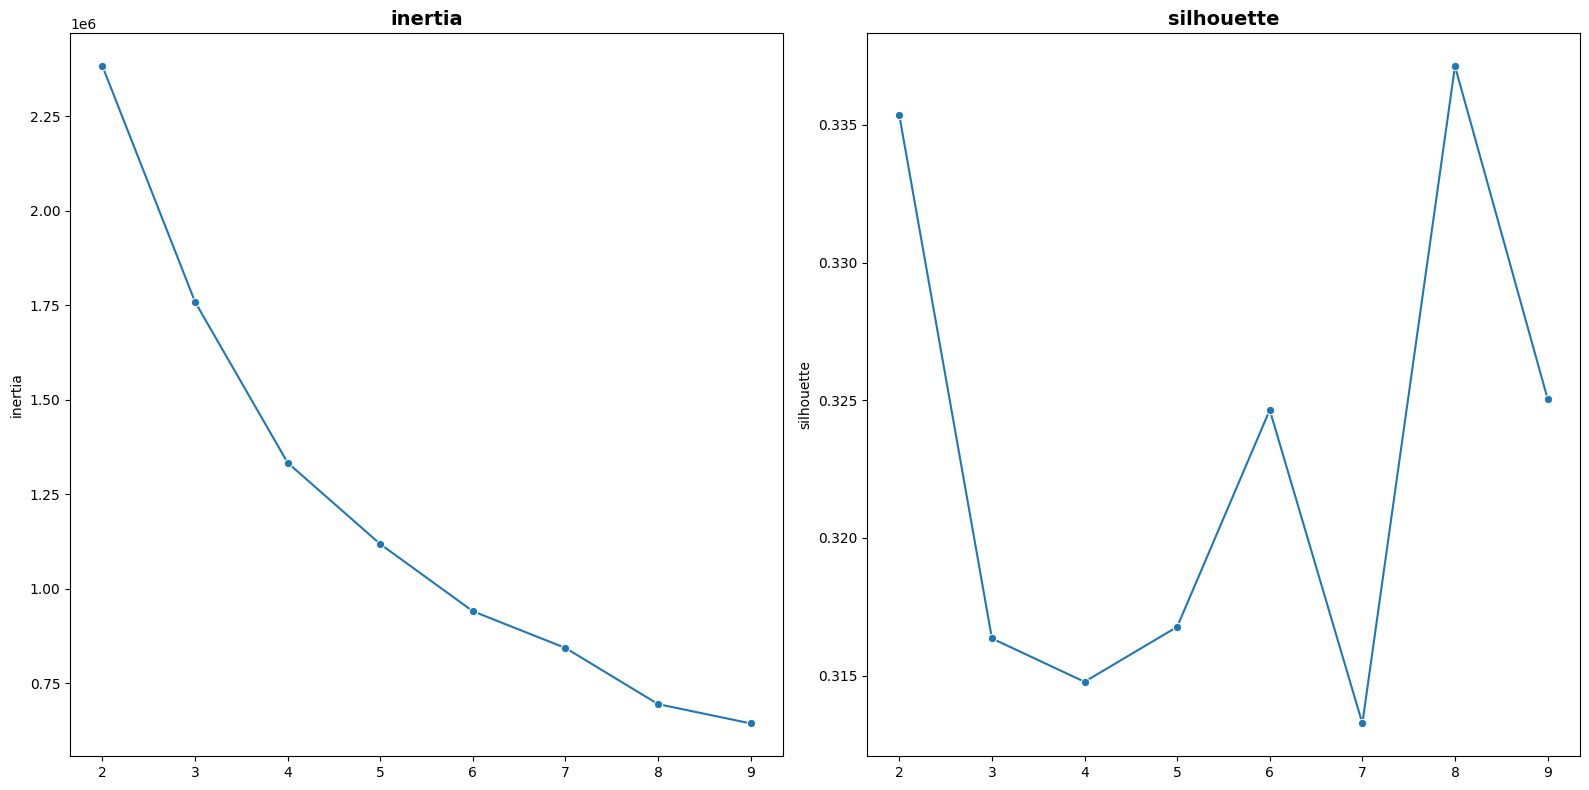

In [30]:
inertia, sil_score = [], []

for i in range(2, 10):
  kmeans = KMeans(n_clusters=i, random_state=42)
  kmeans.fit(df_cl_n)
  label = kmeans.labels_
  sil_score.append(silhouette_score(df_cl_n, label, metric='euclidean'))
  inertia.append(kmeans.inertia_)

data = pd.DataFrame({
    'inertia': inertia,
    'silhouette': sil_score,
})
plt.figure(figsize=(16, 8))
for i, col in enumerate(data.columns):
  plt.subplot(1, 2, i+1)
  sns.lineplot(x=range(2, 10), y=data[col], marker='o')
  plt.title(col, fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

In [31]:
model = KMeans(n_clusters=6, random_state=42)
model.fit(df_cl_n)
label = model.labels_

df_cl_n['cluster'] = model.fit_predict(df_cl_n)
print(f"Silhouette score: {silhouette_score(df_cl_n, label, metric='euclidean')}")
display(df_cl_n['cluster'].value_counts())

Silhouette score: 0.3254293643375251


/tmp/ipython-input-3233672232.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cl_n['cluster'] = model.fit_predict(df_cl_n)


cluster
1    184
0    108
3    105
5    101
4    100
2     69
Name: count, dtype: int64

In [32]:
df_cl_n

Total day minutes  Total day charge  Total night minutes  cluster
0                184.5             31.37                215.8        1
1                129.1             21.95                208.8        5
2                332.9             56.59                160.6        3
3                110.4             18.77                189.6        4
4                119.3             20.28                178.7        4
..                 ...               ...                  ...      ...
662              137.1             23.31                247.6        5
663               83.6             14.21                229.5        5
664              193.9             32.96                210.1        1
665              169.8             28.87                193.7        1
666              213.8             36.35                139.2        0

[667 rows x 4 columns]

In [33]:
df_cl_agg = df_cl_n.groupby(by='cluster').agg({
    'Total day minutes': 'mean',
    'Total day charge': 'mean',
    'Total night minutes': 'mean'
})

df_cl_agg

Total day minutes  Total day charge  Total night minutes
cluster                                                          
0               206.793519         35.155463           135.902778
1               174.578261         29.678967           206.395652
2               216.752174         36.848261           269.765217
3               259.459048         44.108762           200.532381
4               120.998000         20.570200           157.754000
5               118.192079         20.093168           248.422772

#**Conclusion**
---
The results of the classification model has proven satisfactory, with the best-performing model being the Logistic Regression. The model yielded Accuracy, Precision, Recall, and F1-Scores near the 80th percentile (around 80%), which is fairly decent. It could also be ascertained, based on the results of this model, that the following features contributed the most to customer churn:
1. **Area code**: the customer's particular area code, which may mean that certain area's customer purchasing power might be lower.
2. **Number vmail messages**: number of vmail messages received by the customer may indicate a customer's loyalty to the service.
3. **Total day minutes**: duration of calls during the day, which may indicate how often a customer use the service.
4. **Total eve minutes**: duration of calls during the day, which may indicate the frequency that a customer uses the service.
5. **Total night calls**: duration of calls during the evening, which may show the customer's frequency of using the service.
6. **Total intl minutes**: duration of international calls done or taken by the customer, which suggests that a customer is loyalty in using the company's service.
7. **Total intl calls**: number of international calls done or taken by the customer, which may indicate the customer's loyalty and trust to the service.
8. **Total intl charge**: may indicate that customers who pay more for the inernational service are more loyal, and as such, less likely to churn.
9. **Customer service calls**: may suggest that if a customer rarely does customer service calls, the customer is satisfied with the service.
10. **Voice mail plan_Yes**: suggests that if a customer has the voice mail plan, then the customer is more loyal to the company's services.
11. **International plan_Yes**: suggests that if a customer has an international plan, then the customer is more loyal to the company's services.

On the other hand, the results of clustering are much less conclusive, having a very low silhouette score, and as such, does not provide much insight.